In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

# Define the path to the Excel file

file_path = r"C:\Users\shaur\OneDrive\Desktop\Codes\Churn Analysis\Prediction_Data.xlsx"

 

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

 

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   12210-AND    Male   66      No  Andhra Pradesh                    9   
1   12531-AND    Male   56      No  Andhra Pradesh                    1   
2   13500-BIH    Male   51      No           Bihar                    9   
3   14399-MAD  Female   56     Yes  Madhya Pradesh                    8   
4   14622-PUN  Female   49     Yes          Punjab                    9   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31        NaN            No             No  ...   
1                12        NaN            No             No  ...   
2                18        NaN            No             No  ...   
3                 9        NaN            No             No  ...   
4                15        NaN            No             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      34.299999    577.150024           0.0   
1  Bank Wi

In [17]:
# Drop columns that won't be used for prediction
# Drop columns that won't be used for prediction
data = data.drop([
    'Customer_ID', 'Churn_Category', 'Churn_Reason',
    'Total_Extra_Data_Charges', 'Married', 'Multiple_Lines', 'Streaming_Music',
    'Online_Backup', 'Gender', 'Streaming_Movies', 'Streaming_TV',
    'Device_Protection_Plan', 'Total_Refunds', 'Unlimited_Data', 'Phone_Service'
], axis=1)


 

# List of columns to be label encoded

columns_to_encode = [
    'State', 'Value_Deal', 'Internet_Service', 'Internet_Type',
    'Online_Security', 'Premium_Support', 'Contract',
    'Paperless_Billing', 'Payment_Method'
]


 

# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

 

# Train the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[806  56]
 [140 200]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       862
           1       0.78      0.59      0.67       340

    accuracy                           0.84      1202
   macro avg       0.82      0.76      0.78      1202
weighted avg       0.83      0.84      0.83      1202



C:\Users\shaur\AppData\Local\Temp\ipykernel_23312\3560559519.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


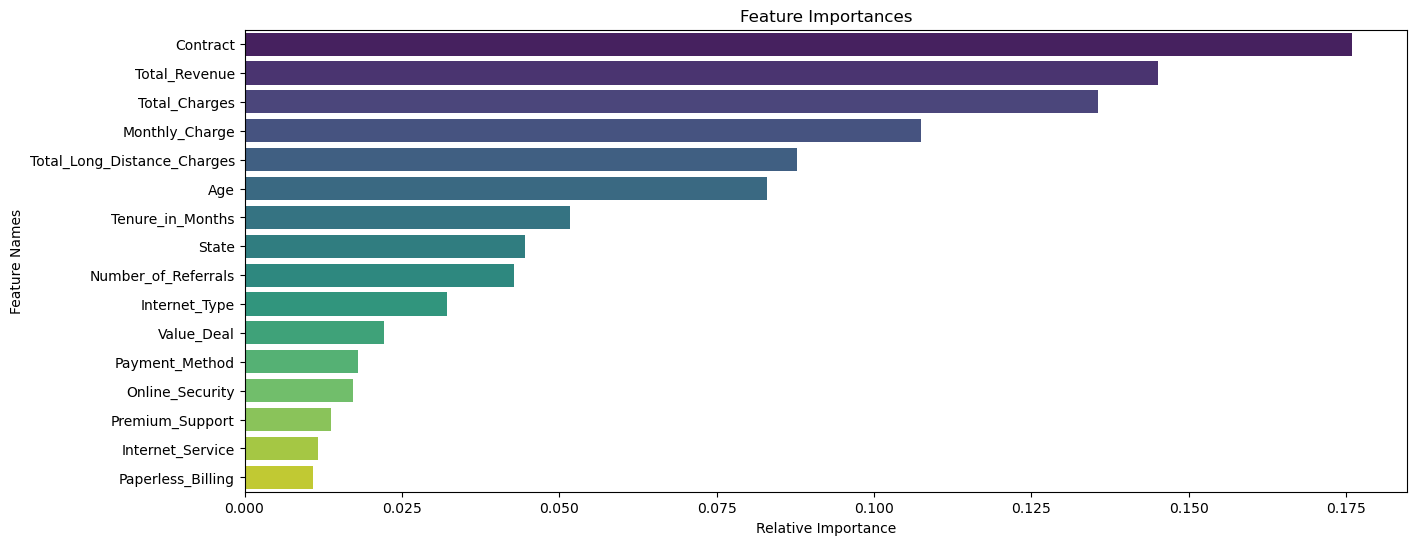

In [20]:
# Make predictions

y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [23]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\shaur\OneDrive\Desktop\Codes\Churn Analysis\Prediction_Data.xlsx"

 

# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

 

# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data

print(new_data.head())

 

# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

 

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column])
    else:
        print(f"Dropping unused column: {column}")
        new_data = new_data.drop(column, axis=1)

    
selected_features = X_train.columns
new_data = new_data[selected_features]
 

# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"C:\Users\shaur\OneDrive\Desktop\Codes\Churn Analysis\Predictions.csv", index=False)

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   12257-ASS  Female   39      No          Assam                    9   
1   13946-HAR  Female   41     Yes        Haryana                    1   
2   14567-TAM    Male   43      No     Tamil Nadu                    1   
3   15591-KAR  Female   26      No      Karnataka                    3   
4   15803-UTT  Female   34      No  Uttar Pradesh                    6   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 1        NaN           Yes             No  ...   
1                 3     Deal 5           Yes             No  ...   
2                 9        NaN           Yes             No  ...   
3                31        NaN           Yes             No  ...   
4                31        NaN           Yes             No  ...   

  Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0    Credit Card      19.549999     19.549999           0.0   
1    Credit Card    